<a href="https://colab.research.google.com/github/icattj123/11181073_ICat_DM_IF-IT/blob/main/11181073_ICat_DM_IF_ITK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount data dari Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Mengarahkan Folder ke GDrive , folder tugas, dan folder DM 

In [ ]:
#Direct Folder
!ls "/content/gdrive/My Drive/Tugas/DM"

11181073_ICat_DM_IF-ITK.ipynb  IRIS.csv


In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = pd.read_csv('IRIS.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


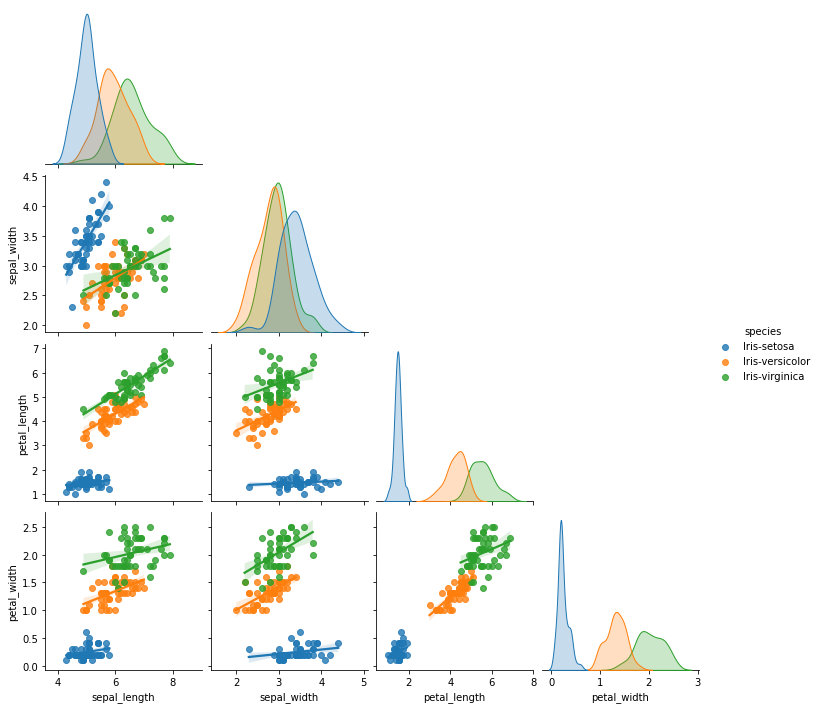

In [ ]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

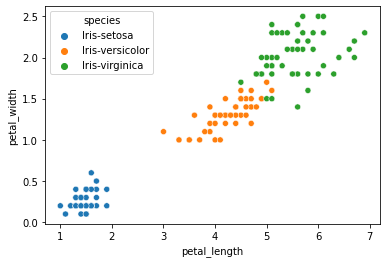

In [ ]:
plt.figure;
sns.scatterplot(x=iris.petal_length, y=iris.petal_width, hue=iris.species)

MODEL

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

iris['species'] = label_encoding.fit_transform(iris['species'])
iris.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,0
133,6.3,2.8,5.1,1.5,2
118,7.7,2.6,6.9,2.3,2
144,6.7,3.3,5.7,2.5,2
11,4.8,3.4,1.6,0.2,0
56,6.3,3.3,4.7,1.6,1
4,5.0,3.6,1.4,0.2,0
82,5.8,2.7,3.9,1.2,1


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y = iris.species
X = iris.drop('species',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
X.sample(4)

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
54,6.5,2.8,4.6,1.5
123,6.3,2.7,4.9,1.8
70,5.9,3.2,4.8,1.8


Bayes

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Akurasi SVM: ' + "{:.1%}".format(accuracy_score(y_predict, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
Akurasi SVM: 93.3%


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.9444444444444444

In [ ]:
results = knn.predict(X_test)

In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  total
Real                                                                
Iris-setosa               26                0               0     26
Iris-versicolor            0               32               1     33
Iris-virginica             0                4              27     31
total                     26               36              28     90


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        26
Iris-versicolor      0.889     0.970     0.928        33
 Iris-virginica      0.964     0.871     0.915        31

       accuracy                          0.944        90
      macro avg      0.951     0.947     0.948        90
   weighted avg      0.947     0.944     0.944        90



Cross Validation KNN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100))

Accuracy: 94.4


In [ ]:
 print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),"(+/- %0.1f)" % (scores.std() * 100))

Accuracy for Cross Validation: 96.7 (+/- 2.1)


In [ ]:
k_list = list(range(1,31))

In [ ]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [ ]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002193,0.001063,0.002999,0.001388,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.001583,0.000200,0.002268,0.000020,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.001739,0.000620,0.002475,0.000341,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.001692,0.000505,0.002333,0.000060,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001588,0.000139,0.002367,0.000155,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


In [ ]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


In [ ]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".
      format(grid_table.at[grid.best_index_,'rank_test_score'],
             grid_table.at[grid.best_index_,'params'],
             grid_table.at[grid.best_index_,'mean_test_score'],
             grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 6}, highest mean accuracy along with the cross validation = 0.9800000000000001 and lowest standard deviation = 0.016329931618554516


In [ ]:
import matplotlib.pyplot as plt

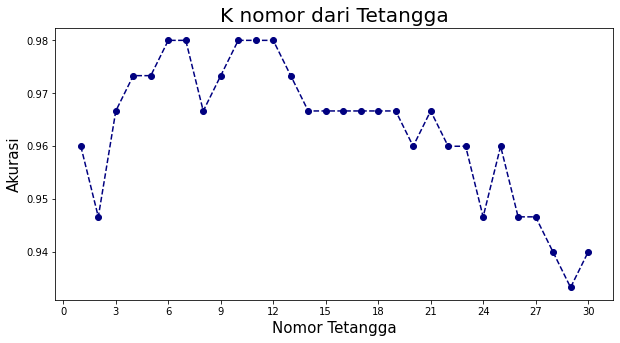

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('Nomor Tetangga', fontdict={'fontsize': 15})
plt.ylabel('Akurasi', fontdict={'fontsize': 15})
plt.title('K nomor dari Tetangga', fontdict={'fontsize': 20})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()